In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
file_path="data/rideshare_kaggle.csv"
cab_rides_data=pd.read_csv(file_path)

In [27]:
cab_rides_data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [28]:
cab_rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [29]:
missing_values = cab_rides_data.isnull().sum()

In [30]:
missing_values

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [31]:
missing_values_per_cab_type=cab_rides_data.groupby('cab_type')['price'].apply(lambda x:x.isnull().sum())

In [32]:
missing_values_per_cab_type

cab_type
Lyft        0
Uber    55095
Name: price, dtype: int64

In [33]:
mean_uber_price = cab_rides_data[cab_rides_data['cab_type'] == 'Uber']['price'].mean()
cab_rides_data['price'] = cab_rides_data['price'].fillna(mean_uber_price)

In [34]:
missing_values_per_cab_type=cab_rides_data.groupby('cab_type')['price'].apply(lambda x:x.isnull().sum())
missing_values_per_cab_type

cab_type
Lyft    0
Uber    0
Name: price, dtype: int64

In [35]:
cab_rides_data['is_rain'] = cab_rides_data['short_summary'].str.contains('rain', case=False).astype(int)

In [36]:
cab_rides_data['datetime'] = pd.to_datetime(cab_rides_data['datetime'], format='%Y-%m-%d %H:%M:%S')

In [37]:
cab_rides_data['date'] = cab_rides_data['datetime'].dt.date
cab_rides_data['time'] = cab_rides_data['datetime'].dt.time
cab_rides_data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,is_rain,date,time
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,0,2018-12-16,09:30:07
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,1,2018-11-27,02:00:23
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,0,2018-11-28,01:00:22
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,0,2018-11-30,04:53:02
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,0,2018-11-29,03:49:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,0,2018-12-01,23:53:05
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,0,2018-12-01,23:53:05
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,0,2018-12-01,23:53:05
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,0,2018-12-01,23:53:05


In [38]:
# Create "odd_time" column
cab_rides_data['odd_time'] = cab_rides_data['time'].apply(lambda x: 1 if x.hour < 6 else 0)

# Create "peak_time" column
cab_rides_data['peak_time'] = cab_rides_data['time'].apply(lambda x: 1 if (x.hour >= 8 and x.hour <= 10) or (x.hour >= 16 and x.hour <= 19) else 0)

# Print the updated dataframe
cab_rides_data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,is_rain,date,time,odd_time,peak_time
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,1544968800,33.73,1545012000,38.07,1544958000,0,2018-12-16,09:30:07,0,1
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,1543251600,36.20,1543291200,43.92,1543251600,1,2018-11-27,02:00:23,1,0
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,1543320000,31.04,1543377600,44.12,1543320000,0,2018-11-28,01:00:22,1,0
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,1543510800,30.30,1543550400,38.53,1543510800,0,2018-11-30,04:53:02,1,0
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,1543420800,29.11,1543392000,35.75,1543420800,0,2018-11-29,03:49:20,1,0


In [39]:
#sorting by datetime column
cab_rides_data = cab_rides_data.sort_values(by='datetime')

In [40]:
cab_rides_data['day_of_week'] = cab_rides_data['datetime'].dt.day_name()

In [41]:
# Create "is_weekend" column
cab_rides_data['is_weekend'] = cab_rides_data['day_of_week'].apply(lambda x: 1 if x=="Saturday" or x=="Sunday" else 0)
cab_rides_data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,is_rain,date,time,odd_time,peak_time,day_of_week,is_weekend
66422,a7b50600-c6c5-4e6c-bea9-4487344196d4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North Station,Haymarket Square,Uber,...,1543136400,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0
446073,9962f244-8fce-4ae9-a583-139d5d7522e1,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Theatre District,North End,Uber,...,1543136400,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0
184332,4aa68a5d-abc0-4fdf-a47f-0003617afbae,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North End,West End,Lyft,...,1543136400,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0
167114,ef8b695c-c24d-4ac1-b3fe-4aa1a7ed79f4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Boston University,Beacon Hill,Lyft,...,1543136400,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0
184333,89f35ef7-7129-483d-b3e6-d89afdf6946d,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North End,West End,Lyft,...,1543136400,43.17,1543186800,0,2018-11-26,03:40:46,1,0,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34918,e299c3bf-a429-4b19-af4a-ebd8e9ad74f7,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Financial District,Haymarket Square,Uber,...,1545134400,31.84,1545109200,0,2018-12-18,19:15:10,0,1,Tuesday,0
215397,20caa061-2ded-49f8-882b-1e7eae6285ff,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Fenway,Theatre District,Uber,...,1545134400,31.84,1545109200,0,2018-12-18,19:15:10,0,1,Tuesday,0
166550,7f1cbf41-2136-4e37-889d-dd0dfff02d38,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Haymarket Square,Back Bay,Uber,...,1545134400,31.84,1545109200,0,2018-12-18,19:15:10,0,1,Tuesday,0
290785,8c28dc35-c4a8-41e8-abe8-d5d65849448d,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Northeastern University,Beacon Hill,Lyft,...,1545134400,31.84,1545109200,0,2018-12-18,19:15:10,0,1,Tuesday,0


In [42]:
# Select features and target variable
selected_features = [
    'distance', 'surge_multiplier', 'temperature', 'humidity', 'windSpeed',
    'precipIntensity', 'is_rain', 'hour', 'day_of_week', 'is_weekend'
]
target = 'price'

# Create feature matrix (X) and target vector (y)
X = cab_rides_data[selected_features]
y = cab_rides_data[target]

# Convert categorical columns (e.g., is_rain, day_of_week) to numerical values
X = pd.get_dummies(X, columns=['day_of_week', 'is_weekend'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (554456, 15)
X_test shape: (138615, 15)


In [43]:
# Linear Regression
# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
print("Linear Regression Results:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_linear))
print("R-squared (R2):", r2_score(y_test, y_pred_linear))

Linear Regression Results:
Mean Squared Error (MSE): 66.67380182938464
R-squared (R2): 0.16443163339397837


In [44]:
# Train the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
print("Random Forest Regressor Results:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))
print("R-squared (R2):", r2_score(y_test, y_pred_rf))

Random Forest Regressor Results:
Mean Squared Error (MSE): 80.47629683425012
R-squared (R2): -0.008543776585123952


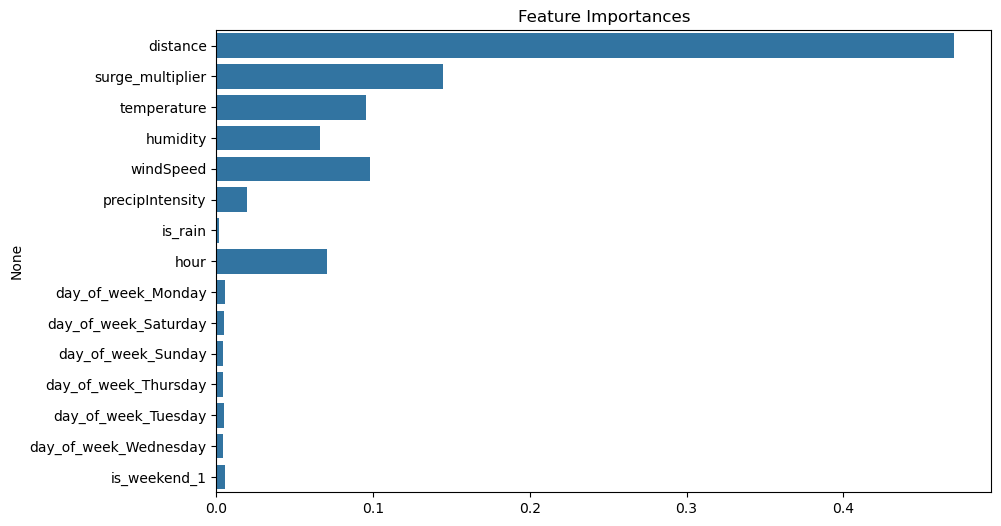

In [45]:
# Plot feature importances from Random Forest
importances = random_forest_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.show()

In [46]:
# Compare the models
print("Model Comparison:")
print("Linear Regression - MSE:", mean_squared_error(y_test, y_pred_linear), "| R2:", r2_score(y_test, y_pred_linear))
print("Random Forest Regressor - MSE:", mean_squared_error(y_test, y_pred_rf), "| R2:", r2_score(y_test, y_pred_rf))

Model Comparison:
Linear Regression - MSE: 66.67380182938464 | R2: 0.16443163339397837
Random Forest Regressor - MSE: 80.47629683425012 | R2: -0.008543776585123952
